In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv('ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


### Test whether your data is of the correct type
When working with time series data in pandas, any date information should be formatted as a datetime64 type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the .dtypes attribute. Fortunately, if your date columns come as strings, epochs, etc… you can use the to_datetime() function to convert them to the appropriate datetime64 type:

df['date_column'] = pd.to_datetime(df['date_column'])

In [10]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)


date    object
Y        int64
dtype: object


In [11]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


In [12]:
print(discoveries)

         date  Y
0  1860-01-01  5
1  1861-01-01  3
2  1862-01-01  0
3  1863-01-01  2
4  1864-01-01  0
..        ... ..
95 1955-01-01  1
96 1956-01-01  0
97 1957-01-01  0
98 1958-01-01  2
99 1959-01-01  0

[100 rows x 2 columns]


In [13]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')
discoveries

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0
...,...
1955-01-01,1
1956-01-01,0
1957-01-01,0


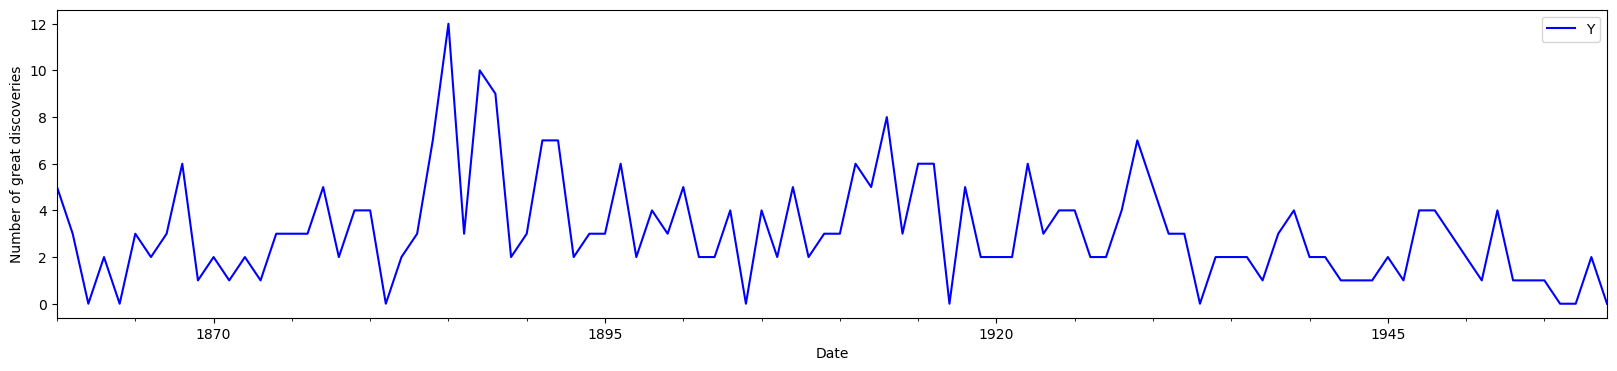

<Figure size 640x480 with 0 Axes>

In [14]:

# Plot the time series in your DataFrame
ax = discoveries.plot(color ='blue',figsize=(20,4))

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')
plt.figure()
# Show plot
plt.show()

### Specify plot styles
The matplotlib library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command plt.style.use(your_stylesheet) where your_stylesheet is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command print(plt.style.available). For the rest of this course, we will use the awesome fivethirtyeight style sheet

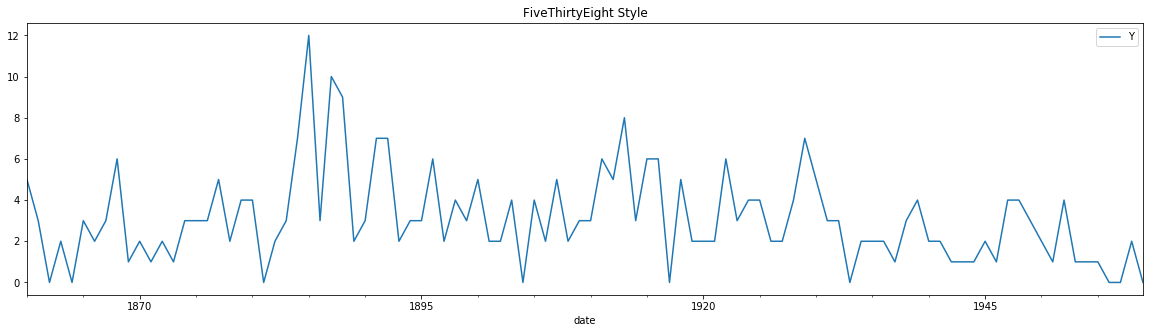

In [49]:
# Plot the time series
ax1 = discoveries.plot(figsize = (20,5))
ax1.set_title('FiveThirtyEight Style')
plt.show()

### Exercise
Exercise
Display and label plots
As you saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the .plot() method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation ax = df.plot(...) and wondered about the purpose of the ax object. This is because the plot function returns a matplotlib AxesSubplot object, and it is common practice to assign this returned object to a variable called ax. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.

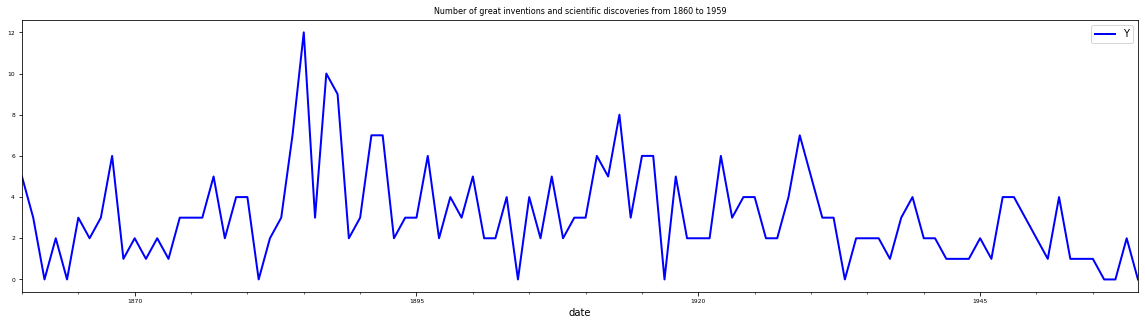

In [53]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(20, 5), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

### Subset time series data
When plotting time series data, you may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range:

subset_data = discoveries['1950-01-01':'1960-01-01']
Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the datetime type. Failing that, the pandas library will return an error message.

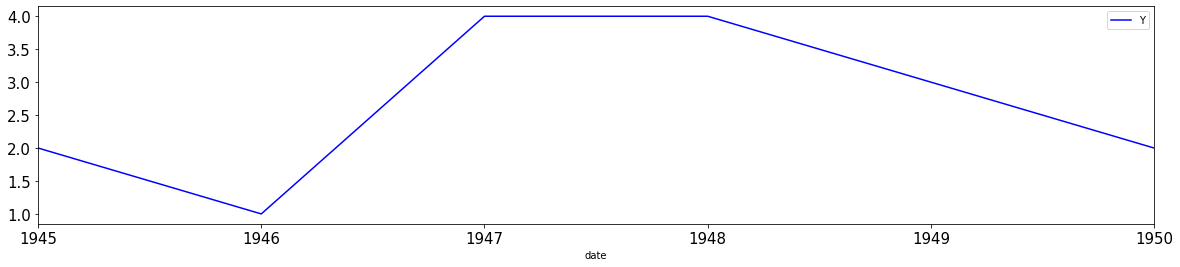

In [55]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15, figsize = (20, 4))

# Show plot
plt.show()

### Add vertical and horizontal markers
Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command:

ax.axvline('1945-01-01', linestyle='--')

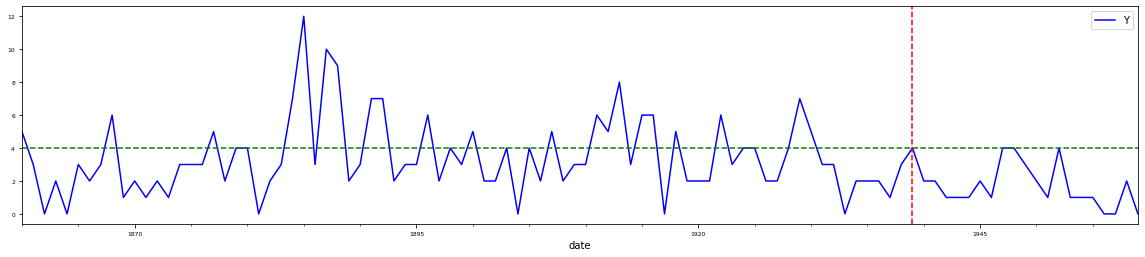

In [57]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6, figsize = (20, 4))

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

### Add shaded regions to your plot
When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command:

ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)
Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

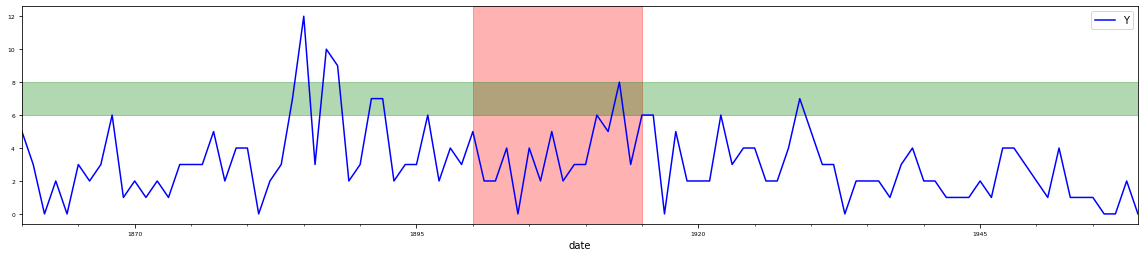

In [60]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6, figsize = (20, 4))

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()